Introduction to NLP fundamentals in Tensorflow



NLP has the goal of deriving information out of natural language (could be sequences text or speech).
Another common term for NLP problems is sequence to sequence problems (seq2seq).

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2024-09-23 05:40:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-23 05:40:25 (97.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



Get a text dataset

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-09-23 05:40:29--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   655KB/s    in 0.9s    

2024-09-23 05:40:30 (655 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Visualizing a text dataset

In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [6]:
# Shuffle training dataframe

train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# What does the text data look like?

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# How many examples of each class

train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [9]:
# How many total samples?

len(train_df), len(test_df
                   )

(7613, 3263)

In [10]:
# Let's visualize some random examples

import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():

  _, text, target = row
  print(f"Target: {row.target}", "(real disaster)" if row.target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
//screams in the distance// http://t.co/Cfe9HUQN0h

---

Target: 0 (not real disaster)
Text:
@DaughterofNai Tenshi activated Yuki's fire card!

---

Target: 1 (real disaster)
Text:
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...

---

Target: 0 (not real disaster)
Text:
Perfect night for a soak! Lava here I come?? http://t.co/cyv2zG935g

---

Target: 0 (not real disaster)
Text:
@nagel_ashley @Vicken52 @BasedLaRock @goonc1ty rip the world... its burning

---



In [11]:
# Splitting into training and validation datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# use train_test_splot to split training data and validation data

train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size=0.1,
    # Use 10% of the data for validation
    random_state=42

)

In [14]:
# check the lengths

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
len(train_df_shuffled)

7613

In [16]:
# Check the first 10 samples

train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [17]:
# Converting text into numbers

# when dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

# There are a few ways of doing this, namely:

# tokenization - direct mapping of token (a token could be a word or a character) to number
# embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

In [18]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [19]:
pip install --upgrade tensorflow


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens = None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=None,
    # pad_to_max_tokens=True
)


In [21]:
# Find the average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [22]:
# Setup text vectorization variables

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=max_length,
)

In [23]:
# Fit the text vectorizer to the training text

text_vectorizer.adapt(train_sentences)

In [24]:
# create a sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Photos: 17 people killed and over 25 injured in deadly Saudi Mosque suicide attack http://t.co/geEKnwJJSz

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 729, 1234,   57,  111,    7,   60,  867,  243,    4, 1690,  312,
         393,   87,  113,    1]])>

In [26]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:]
# least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [27]:
train_sentences

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

# # Create an Embedding using an embedding layer

# To make our embedding layer, we're going to use Keras.

In [28]:
from tensorflow.keras import layers

embedding = layers.Embedding(
    input_dim=max_vocab_length, # set input shape
    output_dim=128, # set size of embedding vector
    embeddings_initializer="uniform",
    input_length=max_length, # how long is each input
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
# Get a random sentence from the training test

random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
The sign-up is open for the FALLING FOR DANGER release day blast and review tour. Sign-up here:... http://t.co/hbdo22nqPZ

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02803104,  0.02407596, -0.01572859, ..., -0.03030984,
          0.00644441, -0.01878932],
        [ 0.04047248,  0.04623052,  0.02573203, ..., -0.00894514,
         -0.01298881,  0.01354792],
        [ 0.02732826, -0.01636332, -0.04572273, ..., -0.00401183,
         -0.00595914, -0.00083356],
        ...,
        [ 0.02857185,  0.00939858,  0.03323219, ..., -0.01147737,
          0.00657519,  0.00695781],
        [ 0.03845021, -0.03915073, -0.02131599, ...,  0.01676849,
         -0.0414013 , -0.04281844],
        [ 0.00097402,  0.02464017,  0.03341461, ..., -0.04606162,
          0.04745623,  0.04587951]]], dtype=float32)>

In [30]:
# Check on the shape of the embedding


# Now we have a got a way to turn our text into numbers.

# We will start with a simple dense model.



In [31]:
# Model0: getting a baseline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a tokenization and modeling pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])


model_0.fit(train_sentences, train_labels)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
# evaluate our baseline model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [33]:
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [34]:
# Make predictions

baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [35]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

Creating an evaluation function for our model experiments

In [36]:
from sklearn.metrics import *

In [37]:
def calculate_results(y_true, y_pred):

  model_accuracy = accuracy_score(y_true, y_pred)*100

  model_precision = precision_score(y_true, y_pred)
  model_recall = recall_score(y_true, y_pred)

  model_f1 = f1_score(y_true, y_pred)
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [38]:
# get baseline results

baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

Model1: a simple dense model

In [39]:
# create a tensorboard callback(need to create a new one for each model)

from helper_functions import create_tensorboard_callback

# create a directory to save TensorBoard logs

SAVE_DIR = "model_logs"

In [40]:
# Build model with the functional API

from tensorflow.keras import layers

inputs = layers.Input(shape =(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")


In [41]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Compile model

model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [43]:
# Fit the model

model_1_history = model_1.fit(train_sentences,
                               train_labels,
                               epochs=5,
                               validation_data=(val_sentences, val_labels),
                               callbacks=[create_tensorboard_callback(
                                   dir_name=SAVE_DIR,
                                   experiment_name = "model_1_dense"
                               )])

Saving TensorBoard log files to: model_logs/model_1_dense/20240923-054525
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6420 - loss: 0.6503 - val_accuracy: 0.7520 - val_loss: 0.5372
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8099 - loss: 0.4692 - val_accuracy: 0.7822 - val_loss: 0.4708
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8590 - loss: 0.3573 - val_accuracy: 0.7900 - val_loss: 0.4560
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8895 - loss: 0.2903 - val_accuracy: 0.7808 - val_loss: 0.4654
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9132 - loss: 0.2438 - val_accuracy: 0.7795 - val_loss: 0.4807


In [44]:
# check the results

model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7644 - loss: 0.5094


[0.48067110776901245, 0.7795275449752808]

In [45]:
# make some predictions and evaluate scores

model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(762, 1)

In [47]:
model_1_pred_probs[:10]

array([[0.3706144 ],
       [0.6504794 ],
       [0.9977374 ],
       [0.19606148],
       [0.12417825],
       [0.9512794 ],
       [0.9215841 ],
       [0.9918738 ],
       [0.96792674],
       [0.3616594 ]], dtype=float32)

In [48]:
# Convert model prediction probs to label formats

model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [49]:
# calcualte our model_1 results

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 77.95275590551181,
 'precision': 0.8,
 'recall': 0.6896551724137931,
 'f1': 0.7407407407407408}

In [50]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

In [51]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False,  True,  True])

Visualizing learned embeddings

In [52]:
# get the vocab from the text, vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [53]:
max_vocab_length

10000

In [54]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [58]:
# Get the weight matrix of the embedding layer

embed_weights  = model_1.get_layer("embedding").get_weights()
print(embed_weights)


[array([[-0.02909132,  0.00625129,  0.01938446, ..., -0.01701243,
        -0.03515957,  0.05799681],
       [ 0.04647459,  0.03960034, -0.04766079, ..., -0.04721756,
         0.00699069, -0.02825302],
       [-0.01691126,  0.03586712, -0.02688768, ..., -0.04179914,
        -0.0063459 , -0.00703111],
       ...,
       [-0.00021844, -0.03431888, -0.00745205, ...,  0.00973424,
        -0.00646652,  0.00058414],
       [ 0.08008516,  0.0449626 , -0.07517276, ..., -0.07939117,
        -0.00624997,  0.05223799],
       [ 0.02402501,  0.03818354, -0.03974522, ..., -0.04390167,
        -0.09163446,  0.0580877 ]], dtype=float32)]


In [60]:
# create embedding files
import io

out_v = io.open('vectors.tsv', 'w',encoding = 'utf-8' )
out_m = io.open('metadata.tsv','w', encoding = 'utf-8' )

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue # skip 0, it's padding
  vec = embed_weights[0][index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


In [61]:
# Download files from colab to upload the projector

try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

New model using pretrained model

In [63]:
import tensorflow as tf
import tensorflow_hub as hub

# Create a Keras layer using the pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
)


In [67]:
pip install --upgrade tensorflow tensorflow-hub


In [74]:
import tensorflow as tf
import tensorflow_hub as hub
# from tensorflow.keras import layers

# Create a Keras layer using the pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
)

# Create model using the sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    # layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name='model_6_USE')

# Compile model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Print model summary
model_6.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7bb46567c430> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

MODEL2: LSTM

In [76]:
# create an lstm model

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation="relu")(x)
print(x.shape)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_7 = tf.keras.Model(inputs, outputs, name="model_7_lstm")

(None, 15, 128)
(None, 15, 64)
(None, 64)
(None, 64)


In [77]:
model_7.summary()

Model: "model_7_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 15, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,366,657 (5.21 MB)

 Trainable params: 1,366,657 (5.21 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [79]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs= 15,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(
                                  dir_name=SAVE_DIR,
                                  experiment_name="model_7_lstm"
                              )])

Saving TensorBoard log files to: model_logs/model_7_lstm/20240923-061657
Epoch 1/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9145 - loss: 0.2907 - val_accuracy: 0.7861 - val_loss: 0.5308
Epoch 2/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9425 - loss: 0.1539 - val_accuracy: 0.7835 - val_loss: 0.7138
Epoch 3/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9522 - loss: 0.1389 - val_accuracy: 0.7848 - val_loss: 0.6660
Epoch 4/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9644 - loss: 0.1006 - val_accuracy: 0.7795 - val_loss: 1.0431
Epoch 5/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9663 - loss: 0.0841 - val_accuracy: 0.7756 - val_loss: 1.0556
Epoch 6/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9688 - loss: 0.0699 - val_accuracy: 0.7717 - val_loss: 1.2235
Epoch 7/15
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9724 - loss: 0.0634 - val_accuracy: 0.7703 - val_loss: 1.3793
Epoch 8/15
215/215 ━━━━━━━━━

In [80]:
# Make predictions with LSTM model

model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


array([[4.4442128e-05],
       [5.2810526e-01],
       [9.9999964e-01],
       [6.3662586e-04],
       [5.1238239e-06],
       [9.9999452e-01],
       [9.2257404e-01],
       [9.9999940e-01],
       [9.9999917e-01],
       [3.0934336e-03]], dtype=float32)

In [83]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [85]:
# Calculate model7 results

model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.03412073490814,
 'precision': 0.8035087719298246,
 'recall': 0.6580459770114943,
 'f1': 0.7235387045813587}

Model3: GRU

In [87]:
# build an rnn using gru cell

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64, return_sequences=True)(x)
print(x.shape)

x = layers.GRU(64)(x)
print(x.shape)

x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


(None, 15, 128)
(None, 15, 64)
(None, 64)


In [88]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 15, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,346,433 (5.14 MB)

 Trainable params: 1,346,433 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics =['accuracy']
)

In [90]:
# Fit the model

model_3_history = model_3.fit(
    train_sentences,
    train_labels,
    epochs=10,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(
        dir_name=SAVE_DIR,
        experiment_name="model_3_GRU"
    )]
)

Saving TensorBoard log files to: model_logs/model_3_GRU/20240923-062440
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9018 - loss: 0.2454 - val_accuracy: 0.7782 - val_loss: 0.8155
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9751 - loss: 0.0617 - val_accuracy: 0.7703 - val_loss: 1.3154
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9801 - loss: 0.0365 - val_accuracy: 0.7703 - val_loss: 1.6430
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9815 - loss: 0.0371 - val_accuracy: 0.7730 - val_loss: 1.4762
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9643 - loss: 0.0968 - val_accuracy: 0.7795 - val_loss: 1.2775
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9782 - loss: 0.0451 - val_accuracy: 0.7703 - val_loss: 1.5549
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9797 - loss: 0.0390 - val_accuracy: 0.7690 - val_loss: 1.6410
Epoch 8/10
215/215 ━━━━━━━━━━

In [91]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[6.2734958e-05],
       [9.7436416e-01],
       [9.9998987e-01],
       [2.5162518e-01],
       [2.4587873e-05],
       [9.9997342e-01],
       [9.9148631e-01],
       [9.9998856e-01],
       [9.9998927e-01],
       [2.2480154e-01]], dtype=float32)

In [92]:
# Convert model 3 pred probs to labels

model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [93]:
# calculate model 3 results

model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results


{'accuracy': 76.64041994750657,
 'precision': 0.7575757575757576,
 'recall': 0.7183908045977011,
 'f1': 0.7374631268436579}

model 4: Bidirectional RNN

In [94]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")



(None, 15, 128)
(None, 15, 128)
(None, 128)


In [95]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 15, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Compile model

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [98]:
# Fit the model

model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs=10,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(
        dir_name=SAVE_DIR,
        experiment_name="model_4_bidirectional"
    )]
)

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240923-065600
Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9343 - loss: 0.1734 - val_accuracy: 0.7415 - val_loss: 1.2353
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9803 - loss: 0.0402 - val_accuracy: 0.7598 - val_loss: 1.3731
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9846 - loss: 0.0329 - val_accuracy: 0.7612 - val_loss: 1.3342
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9846 - loss: 0.0284 - val_accuracy: 0.7703 - val_loss: 1.3836
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9809 - loss: 0.0380 - val_accuracy: 0.7375 - val_loss: 1.4405
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9819 - loss: 0.0397 - val_accuracy: 0.7612 - val_loss: 1.5131
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9877 - loss: 0.0279 - val_accuracy: 0.7533 - val_loss: 1.5725
Epoch 8/10
215

In [99]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


array([[2.9652405e-05],
       [7.7414829e-01],
       [9.9998605e-01],
       [7.2826454e-03],
       [9.0658432e-06],
       [9.9997735e-01],
       [9.9294257e-01],
       [9.9999082e-01],
       [9.9998844e-01],
       [6.2428497e-02]], dtype=float32)

In [100]:
# convert pred probs to pred labels

In [101]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [102]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 0.782608695652174,
 'recall': 0.6724137931034483,
 'f1': 0.7233384853168471}

Convolutional Neural Networks for text

In [106]:
# Test our embedding layer, conv1d layer  and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu",padding = 'same')

conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [107]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01091449,  0.01167383, -0.03082076, ...,  0.01320494,
         -0.08908762,  0.00749723],
        [ 0.00163397, -0.02884317, -0.08131859, ..., -0.02352357,
          0.03032506,  0.00801198],
        [ 0.00728598,  0.01151787, -0.03513011, ..., -0.05166676,
         -0.00306212,  0.00468861],
        ...,
        [ 0.05714744,  0.07954074,  0.06668038, ..., -0.055107  ,
          0.01895425,  0.09776732],
        [ 0.05714744,  0.07954074,  0.06668038, ..., -0.055107  ,
          0.01895425,  0.09776732],
        [ 0.05714744,  0.07954074,  0.06668038, ..., -0.055107  ,
          0.01895425,  0.09776732]]], dtype=float32)>

In [108]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05402869, 0.02332436, 0.02885094, 0.04499307, 0.00751258,
         0.        , 0.00503175, 0.        , 0.03946208, 0.        ,
         0.        , 0.        , 0.        , 0.01758805, 0.        ,
         0.        , 0.        , 0.        , 0.02496038, 0.02493352,
         0.        , 0.05523213, 0.        , 0.        , 0.05457135,
         0.        , 0.06421831],
        [0.        , 0.00814342, 0.        , 0.09551687, 0.03228164,
         0.04790099, 0.        , 0.08874054, 0.06626005, 0.01600473,
         0.02724855, 0.08772329, 0.04593751, 0.        , 0.        ,
         0.        , 0.        , 0.02340115, 0.        , 0.06956115,
         0.        , 0.04273618, 0.        , 0.04114588, 0.00462676,
         0.        , 0.03320508, 0.13893938, 0.01626397, 0.06137365,
         0.0728534 , 0.        ],
        [0.        , 0.        , 0.        , 0.0829

In [117]:
# Create 1 dimensional convolutional layer to model sequences

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)

x= layers.Conv1D(filters=64, kernel_size=5, activation="relu",padding = 'same')(x)
x = layers.GlobalMaxPool1D()(x)

# x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

In [118]:
model_5.summary()

Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 15, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,089 (5.04 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [120]:
# Fit the model

model_5_history = model_5.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(
        dir_name=SAVE_DIR,
        experiment_name="model_5_Conv1D"
    )]
)

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20240923-071016
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9688 - loss: 0.1569 - val_accuracy: 0.7572 - val_loss: 0.9786
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9846 - loss: 0.0451 - val_accuracy: 0.7625 - val_loss: 1.0969
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9803 - loss: 0.0464 - val_accuracy: 0.7480 - val_loss: 1.2347
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9787 - loss: 0.0487 - val_accuracy: 0.7480 - val_loss: 1.2323
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9823 - loss: 0.0403 - val_accuracy: 0.7546 - val_loss: 1.1983


In [121]:
# Make some predictions with our conv1d model

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[4.4809591e-02],
       [8.9318693e-01],
       [9.9997699e-01],
       [3.0601049e-02],
       [1.1720830e-06],
       [9.9570256e-01],
       [7.2268599e-01],
       [9.9999750e-01],
       [9.9999976e-01],
       [7.0182616e-01]], dtype=float32)

In [122]:
# convert model 5 pred probs to labels

model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [123]:
# Evaluate model 5 predictions

model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7523510971786834,
 'recall': 0.6896551724137931,
 'f1': 0.7196401799100451}

In [124]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

 Model6: Tensorflow hub pretrained sentence encoder

In [125]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(["I am good", "I am bad"])
print(embed_samples)

tf.Tensor(
[[-0.00552165 -0.09817179  0.05680778 ... -0.01871959  0.03287633
  -0.04863043]
 [-0.01613541 -0.03735304  0.0633231  ... -0.04753214  0.01593679
  -0.00723222]], shape=(2, 512), dtype=float32)


In [127]:
# create a keras layer using the USE pretrained layer from tensorflow hub

sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
)

In [149]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Model, Input

# Create a custom Keras layer to wrap the TensorFlow Hub layer
class CustomKerasLayer(layers.Layer):
    def __init__(self, hub_layer):
        super(CustomKerasLayer, self).__init__()
        self.hub_layer = hub_layer

    def call(self, inputs):
        return self.hub_layer(inputs)

# Create a Keras layer using the pretrained layer from TensorFlow Hub
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
)

# Wrap the KerasLayer in a custom layer
custom_sentence_encoder_layer = CustomKerasLayer(sentence_encoder_layer)

# Define the input
input_text = Input(shape=[], dtype=tf.string)

# Pass the input through the custom sentence encoder layer
encoded_output = custom_sentence_encoder_layer(input_text)

# Add a dense layer
dense_output = layers.Dense(64, activation="relu")(encoded_output)

# Add the final output layer
output = layers.Dense(1, activation="sigmoid")(dense_output)

# Create the model
model_6 = Model(inputs=input_text, outputs=output, name="model_6_USE")

# Compile model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Print model summary
model_6.summary()


Model: "model_6_USE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_keras_layer                   │ (None, 512)                 │               0 │
│ (CustomKerasLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
# Evaluate model 5 predictions

model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

NameError: name 'model_6_preds' is not defined

comparing the performance of each models

In [175]:
all_model_results =  pd.DataFrame({'baseline_results':baseline_results,
                                   'model1':model_1_results,
                                  #  'model2':model_2_results,
                                   'model3':model_3_results,
                                   'model4':model_4_results,
                                   'model5':model_5_results,
                                   'model6':model_6_results,

                                   },
                                  )
all_model_results

,baseline_results,model1,model3,model4,model5,model6
accuracy,79.265092,77.952756,76.640420,76.509186,75.459318,75.459318
precision,0.886179,0.800000,0.757576,0.782609,0.752351,0.752351
recall,0.626437,0.689655,0.718391,0.672414,0.689655,0.689655
f1,0.734007,0.740741,0.737463,0.723338,0.719640,0.719640


In [176]:
all_model_results=all_model_results.transpose()

In [178]:

all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline_results,0.792651,0.886179,0.626437,0.734007
model1,0.779528,0.800000,0.689655,0.740741
model3,0.766404,0.757576,0.718391,0.737463
model4,0.765092,0.782609,0.672414,0.723338
model5,0.754593,0.752351,0.689655,0.719640
model6,0.754593,0.752351,0.689655,0.719640


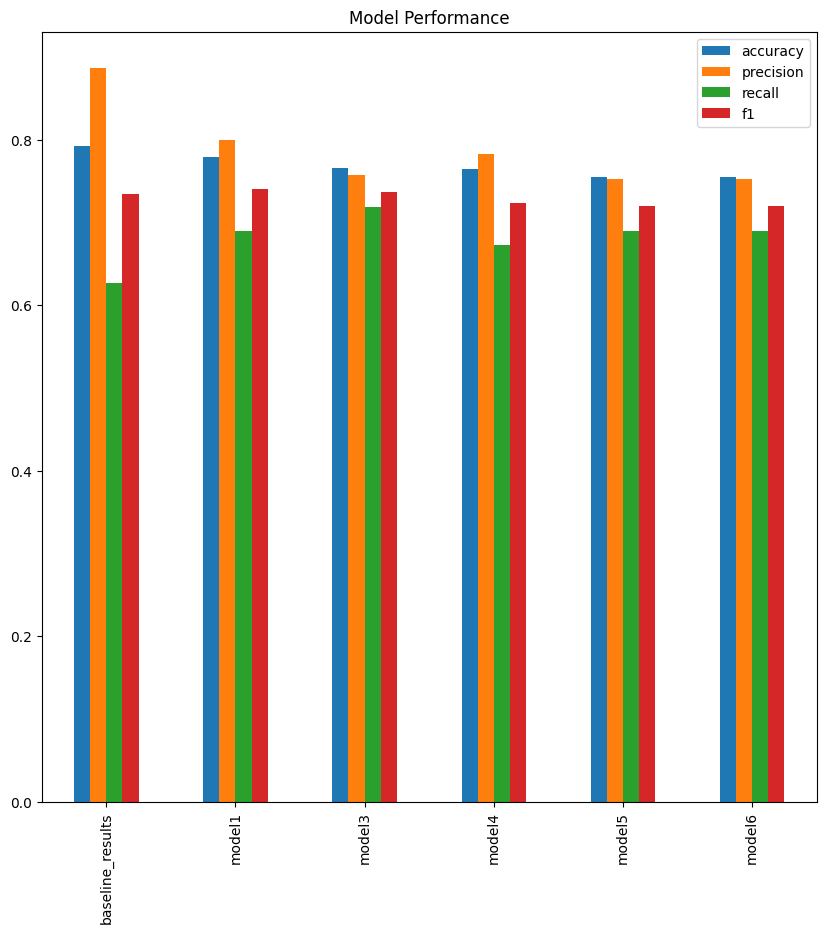

In [179]:
# plot and compare all of the model results

all_model_results.plot(
    kind = 'bar',
    figsize=(10,10),
    title = 'Model Performance'
).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

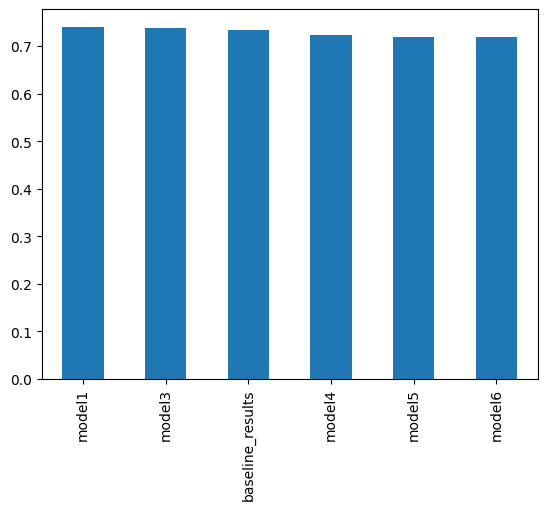

In [182]:
# Sort model results by f1 score

all_model_results.sort_values('f1', ascending=False)["f1"].plot(kind="bar")

saving and loading a trained model

In [190]:
model_5.save('model_5.keras')


In [191]:
import tensorflow_hub as hub
# Load the model
loaded_model = tf.keras.models.load_model('model_5.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [189]:
loaded_model_5.evaluate(val_sentences, val_labels)

FailedPreconditionError: Graph execution error:

Detected at node model_5_Conv1D_1/text_vectorization_1_1/None_Lookup/LookupTableFindV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-189-5d0de9e52ac0>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 429, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 82, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/text_vectorization.py", line 580, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/string_lookup.py", line 391, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 719, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 769, in _lookup_dense

Detected at node model_5_Conv1D_1/text_vectorization_1_1/None_Lookup/LookupTableFindV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-189-5d0de9e52ac0>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 429, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 82, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/text_vectorization.py", line 580, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/string_lookup.py", line 391, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 719, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/index_lookup.py", line 769, in _lookup_dense

2 root error(s) found.
  (0) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node model_5_Conv1D_1/text_vectorization_1_1/None_Lookup/LookupTableFindV2}}]]
	 [[model_5_Conv1D_1/text_vectorization_1_1/None_Lookup/LookupTableFindV2/_16]]
  (1) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node model_5_Conv1D_1/text_vectorization_1_1/None_Lookup/LookupTableFindV2}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_272186]

Finding the most wrong examples

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-09-23 07:58:18--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip.1’

08_model_6_USE_feat 100%[===================>] 916.27M  17.2MB/s    in 54s     

2024-09-23 07:59:13 (16.9 MB/s) - ‘08_model_6_USE_feature_extractor.zip.1’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
replace 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

# Print the current working directory
print(os.getcwd())


In [ ]:
# Import previously trained model from google storage

model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentences, val_labels)